In [326]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd 
import numpy as np
import os as os

In [327]:
os. getlogin()

if os.getlogin()=="JVARGH7":
    path_folder = 'C:/Cloud/Emory University/li, zhongyu - Diabetes Endotypes Project (JV and ZL)'
if os.getlogin()=="zhongyuli":
    path_folder = '/Users/zhongyuli/Library/CloudStorage/OneDrive-EmoryUniversity/Diabetes Endotypes Project (JV and ZL)'

# Rename the dataset into analytic sample
analytic_dataset = pd.read_csv(path_folder + '/working/processed/final_dataset_42124.csv')


analytic_dataset.shape

(5158, 17)

In [328]:
analytic_dataset.head()

study_id  homa2b   homa2ir       bmi  hba1c   ldlc  hdlc  tgl       sbp  \
0         4    54.8  1.207729  29.16903    6.6   98.0  46.0   62  171.5087   
1        11    67.7  0.929368  25.71101    5.9  121.0  58.0   89  129.3313   
2        15   118.6  2.906977  27.47169    5.6  139.0  45.0  150  144.9186   
3        20    81.9  4.048583  39.32834    8.1   89.0  53.0   74  118.3285   
4        21    84.2  6.250000  43.20700    8.7  101.0  42.0  148  159.5890   

       dbp  ratio_th  dmagediag  glucosef2  insulinf2 study  method3  method4  
0  75.8778  1.347826       67.0     6.8820       60.0   jhs        1        1  
1  66.7467  1.534483       79.0     5.7165       48.0   jhs        1        1  
2  78.3681  3.333333       57.0     6.4380      150.0   jhs        1        1  
3  70.0671  1.396226       58.0     8.8800      198.0   jhs        1        1  
4  85.8390  3.523810       42.0    10.7670      300.0   jhs        1        1

In [405]:
method3_df = analytic_dataset[analytic_dataset['method3'] == 1]

method3_df = method3_df.dropna(axis=0)

method3_df['bmi_squared'] = method3_df['bmi']**2
method3_df['log_ratio_th'] = np.log(method3_df['ratio_th'])
method3_df['log_homa2ir'] = np.log(method3_df['homa2ir'])

method3_df.shape

(3446, 20)

In [407]:
method3_df.isnull().sum()


study_id        0
homa2b          0
homa2ir         0
bmi             0
hba1c           0
ldlc            0
hdlc            0
tgl             0
sbp             0
dbp             0
ratio_th        0
dmagediag       0
glucosef2       0
insulinf2       0
study           0
method3         0
method4         0
bmi_squared     0
log_ratio_th    0
log_homa2ir     0
dtype: int64

In [429]:
method3_df.head()

study_id  homa2b   homa2ir       bmi  hba1c   ldlc  hdlc  tgl       sbp  \
0         4    54.8  1.207729  29.16903    6.6   98.0  46.0   62  171.5087   
1        11    67.7  0.929368  25.71101    5.9  121.0  58.0   89  129.3313   
2        15   118.6  2.906977  27.47169    5.6  139.0  45.0  150  144.9186   
3        20    81.9  4.048583  39.32834    8.1   89.0  53.0   74  118.3285   
4        21    84.2  6.250000  43.20700    8.7  101.0  42.0  148  159.5890   

       dbp  ratio_th  dmagediag  glucosef2  insulinf2 study  method3  method4  \
0  75.8778  1.347826       67.0     6.8820       60.0   jhs        1        1   
1  66.7467  1.534483       79.0     5.7165       48.0   jhs        1        1   
2  78.3681  3.333333       57.0     6.4380      150.0   jhs        1        1   
3  70.0671  1.396226       58.0     8.8800      198.0   jhs        1        1   
4  85.8390  3.523810       42.0    10.7670      300.0   jhs        1        1   

   bmi_squared  log_ratio_th  log_homa2ir  
0   850.832311      0.298493     0.188742  
1   661.056035      0.428193    -0.073250  
2   754.693751      1.203973     1.067114  
3  1546.718327      0.333773     1.398367  
4  1866.844849      1.259543     1.832581

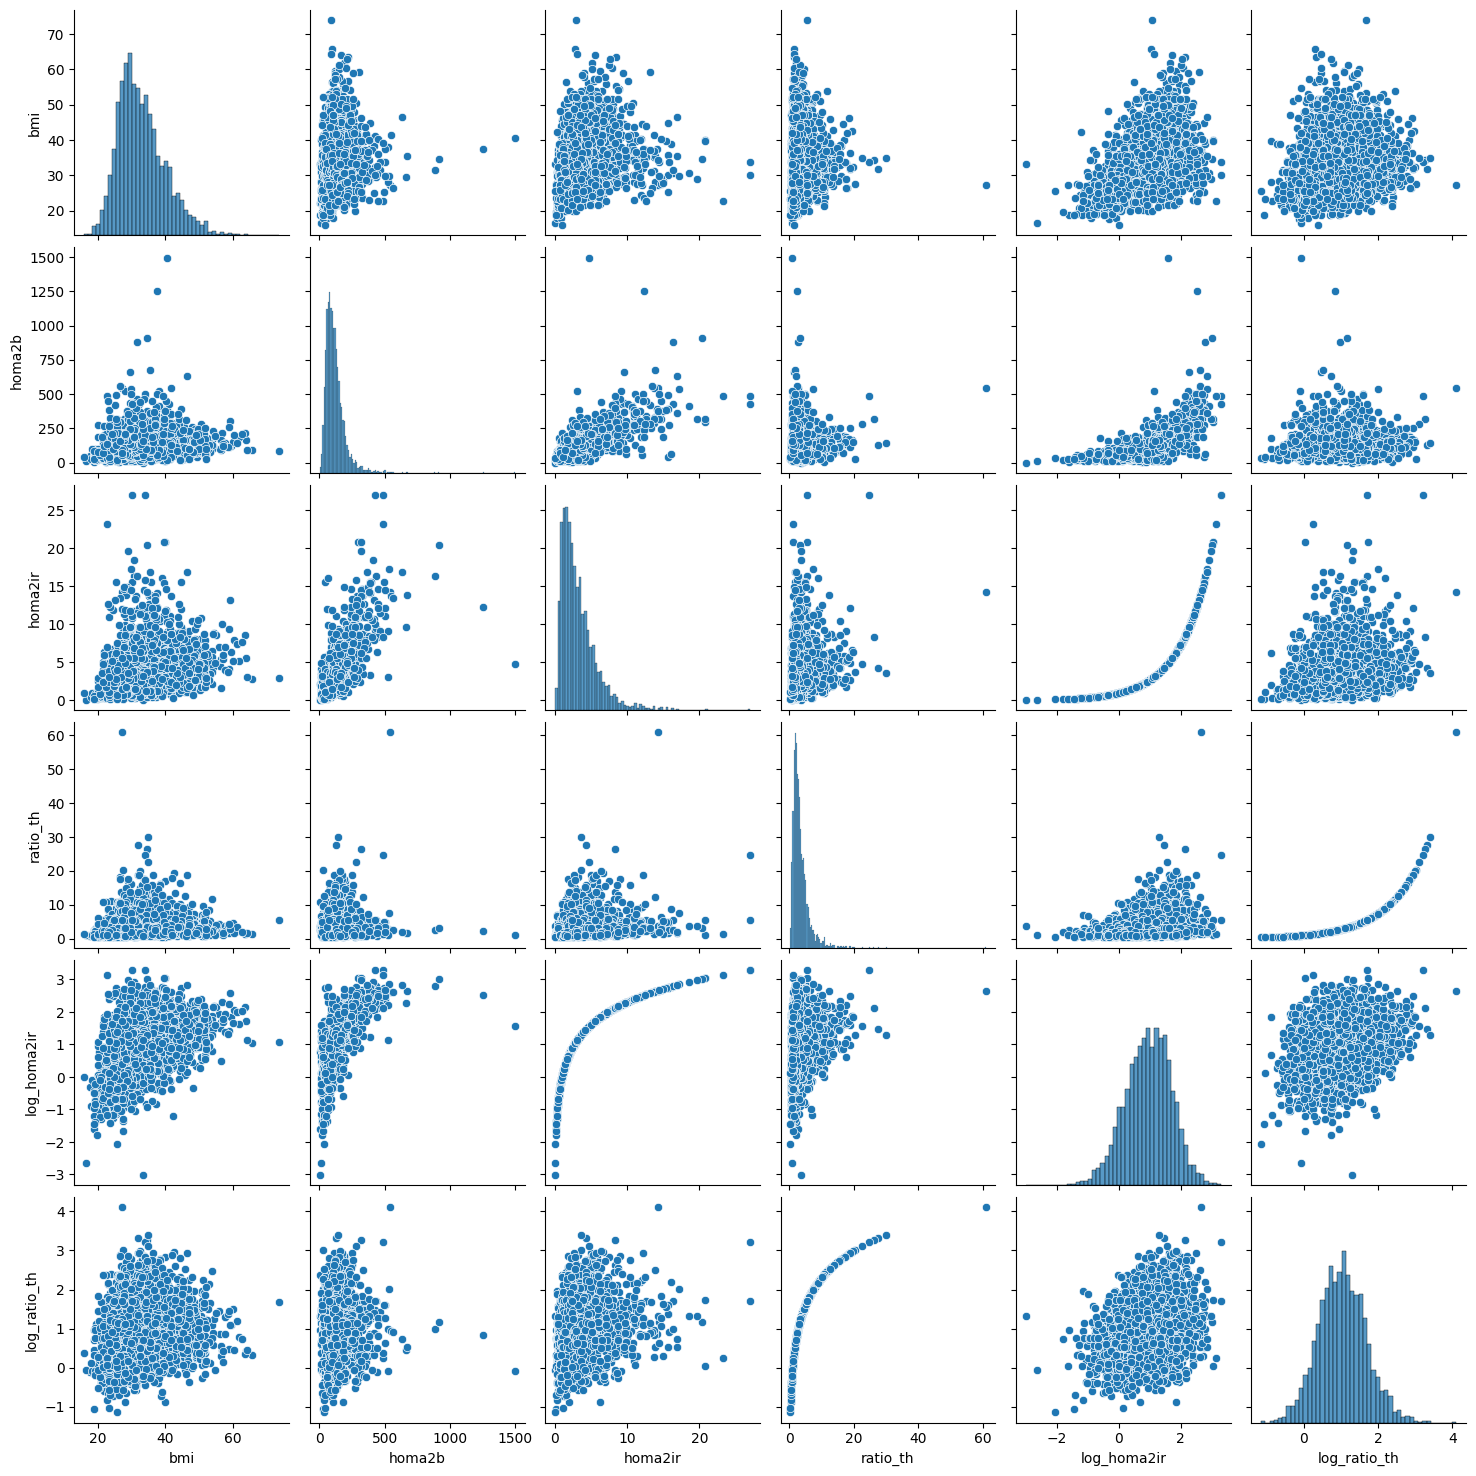

In [430]:
sns.pairplot(method3_df, vars=['bmi','homa2b','homa2ir','ratio_th','log_homa2ir','log_ratio_th'])


## Running k-means on standard set of 5 variables after mean standardization
Variables used: age at diagnosis (dmagediag), hba1c (hba1c), BMI (bmi), HOMA2-B (homa2b), HOMA2-IR (homa2ir)

In [432]:
# Prompt: standardize all variables except study_id, study, method3, and method4, and drop method3 and method4

# Select the columns to standardize
columns_to_standardize = [col for col in method3_df.columns if col not in ['study_id', 'study', 'method3', 'method4','log_homa2ir','log_ratio_th','bmi_squared']]

# Standardize the selected columns
scaler = StandardScaler() 
scaled_data = scaler.fit_transform(method3_df[columns_to_standardize])

# Convert scaled data back to a DataFrame and add the study_id and study columns back
scaled_data_df = pd.DataFrame(scaled_data, columns=columns_to_standardize)
scaled_data_df['study_id'] = method3_df['study_id']
scaled_data_df['study'] = method3_df['study']


scaled_data_df.head()


homa2b   homa2ir       bmi     hba1c      ldlc      hdlc       tgl  \
0 -0.787103 -0.815208 -0.546199  0.312933 -0.274480 -0.114732 -1.016703   
1 -0.628631 -0.920585 -1.032148 -0.432826  0.392224  0.794037 -0.694131   
2 -0.003341 -0.171941 -0.784723 -0.752437  0.913993 -0.190463  0.034642   
3 -0.454188  0.260226  0.881468  1.910989 -0.535365  0.415383 -0.873338   
4 -0.425934  1.093595  1.426529  2.550212 -0.187519 -0.417656  0.010748   

        sbp       dbp  ratio_th  dmagediag  glucosef2  insulinf2  study_id  \
0  2.515409  0.100551 -0.766996   0.304690  -0.033430  -0.758281       4.0   
1  0.254743 -0.488672 -0.701028   1.228134  -0.773255  -0.836198      11.0   
2  1.090207  0.261248 -0.065280  -0.464847  -0.315268  -0.173904      15.0   
3 -0.334996 -0.274409 -0.749890  -0.387893   1.234841   0.137763      20.0   
4  1.876525  0.743340  0.002038  -1.619152   2.432652   0.800056      21.0   

  study  
0   jhs  
1   jhs  
2   jhs  
3   jhs  
4   jhs

In [433]:
kmeans = KMeans(
    init="random", n_clusters=4, n_init=10, max_iter=300, random_state=42
)

# "init" controls the initialization technique. The standard version of the k-means algorithm is implemented by setting init to "random". 
# Setting this to "k-means++" employs an advanced trick to speed up convergence

#"n_clusters" sets k for the clustering step. This is the most important parameter for k-means.

# "n_init" sets the number of initializations to perform. This is important because two runs can converge on different cluster assignments. 
#The default behavior for the scikit-learn algorithm is to perform ten k-means runs and return the results of the one with the lowest SSE.

In [434]:
# select variables to cluster
var_selected = ['bmi', 'hba1c', 'dmagediag', 'homa2b','homa2ir']

kmeans.fit(scaled_data_df[var_selected])

KMeans(init='random', n_clusters=4, n_init=10, random_state=42)

In [435]:
# The lowest SSE value
kmeans.inertia_

8764.114282623399

In [436]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[ 0.66181448, -0.05012018, -0.86210148,  0.19208295,  0.23571792],
       [-0.56004789, -0.24086132,  0.69170082, -0.42435821, -0.52610205],
       [ 0.14648233,  0.04158992,  0.12403014,  2.39960243,  2.36768533],
       [ 0.29634512,  3.34357259, -0.47128099, -0.81405098,  0.0688824 ]])

In [437]:
scaled_data_df['cluster'] = kmeans.labels_
scaled_data_df.head()

homa2b   homa2ir       bmi     hba1c      ldlc      hdlc       tgl  \
0 -0.787103 -0.815208 -0.546199  0.312933 -0.274480 -0.114732 -1.016703   
1 -0.628631 -0.920585 -1.032148 -0.432826  0.392224  0.794037 -0.694131   
2 -0.003341 -0.171941 -0.784723 -0.752437  0.913993 -0.190463  0.034642   
3 -0.454188  0.260226  0.881468  1.910989 -0.535365  0.415383 -0.873338   
4 -0.425934  1.093595  1.426529  2.550212 -0.187519 -0.417656  0.010748   

        sbp       dbp  ratio_th  dmagediag  glucosef2  insulinf2  study_id  \
0  2.515409  0.100551 -0.766996   0.304690  -0.033430  -0.758281       4.0   
1  0.254743 -0.488672 -0.701028   1.228134  -0.773255  -0.836198      11.0   
2  1.090207  0.261248 -0.065280  -0.464847  -0.315268  -0.173904      15.0   
3 -0.334996 -0.274409 -0.749890  -0.387893   1.234841   0.137763      20.0   
4  1.876525  0.743340  0.002038  -1.619152   2.432652   0.800056      21.0   

  study  cluster  
0   jhs        1  
1   jhs        1  
2   jhs        1  
3   jhs        3  
4   jhs        3

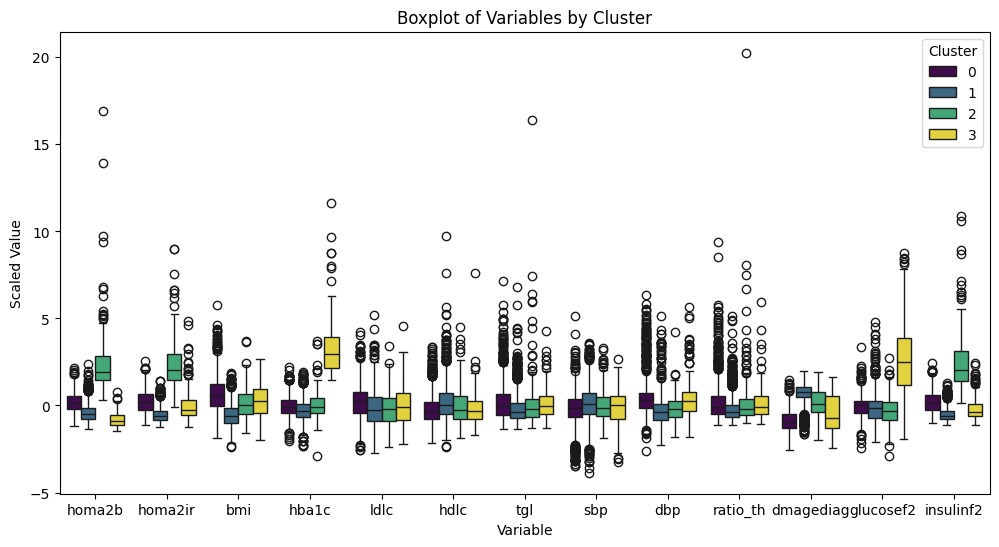

In [439]:
melted_data = pd.melt(scaled_data_df, id_vars=['cluster','study_id','study'], var_name='Variable', value_name='Value')

plt.figure(figsize=(12, 6))
sns.boxplot(data=melted_data, x='Variable', y='Value', hue='cluster', palette='viridis')
plt.title('Boxplot of Variables by Cluster')
plt.xlabel('Variable')
plt.ylabel('Scaled Value')
plt.legend(title='Cluster', loc='upper right')
plt.show()

In [441]:

scaled_data_df['cluster_labels'] = scaled_data_df['cluster'].map({0:'MOD',1:'MARD',2:'SIRD',3:'SIDD'})

scaled_data_df.head()

homa2b   homa2ir       bmi     hba1c      ldlc      hdlc       tgl  \
0 -0.787103 -0.815208 -0.546199  0.312933 -0.274480 -0.114732 -1.016703   
1 -0.628631 -0.920585 -1.032148 -0.432826  0.392224  0.794037 -0.694131   
2 -0.003341 -0.171941 -0.784723 -0.752437  0.913993 -0.190463  0.034642   
3 -0.454188  0.260226  0.881468  1.910989 -0.535365  0.415383 -0.873338   
4 -0.425934  1.093595  1.426529  2.550212 -0.187519 -0.417656  0.010748   

        sbp       dbp  ratio_th  dmagediag  glucosef2  insulinf2  study_id  \
0  2.515409  0.100551 -0.766996   0.304690  -0.033430  -0.758281       4.0   
1  0.254743 -0.488672 -0.701028   1.228134  -0.773255  -0.836198      11.0   
2  1.090207  0.261248 -0.065280  -0.464847  -0.315268  -0.173904      15.0   
3 -0.334996 -0.274409 -0.749890  -0.387893   1.234841   0.137763      20.0   
4  1.876525  0.743340  0.002038  -1.619152   2.432652   0.800056      21.0   

  study  cluster cluster_labels  
0   jhs        1           MARD  
1   jhs        1           MARD  
2   jhs        1           MARD  
3   jhs        3           SIDD  
4   jhs        3           SIDD

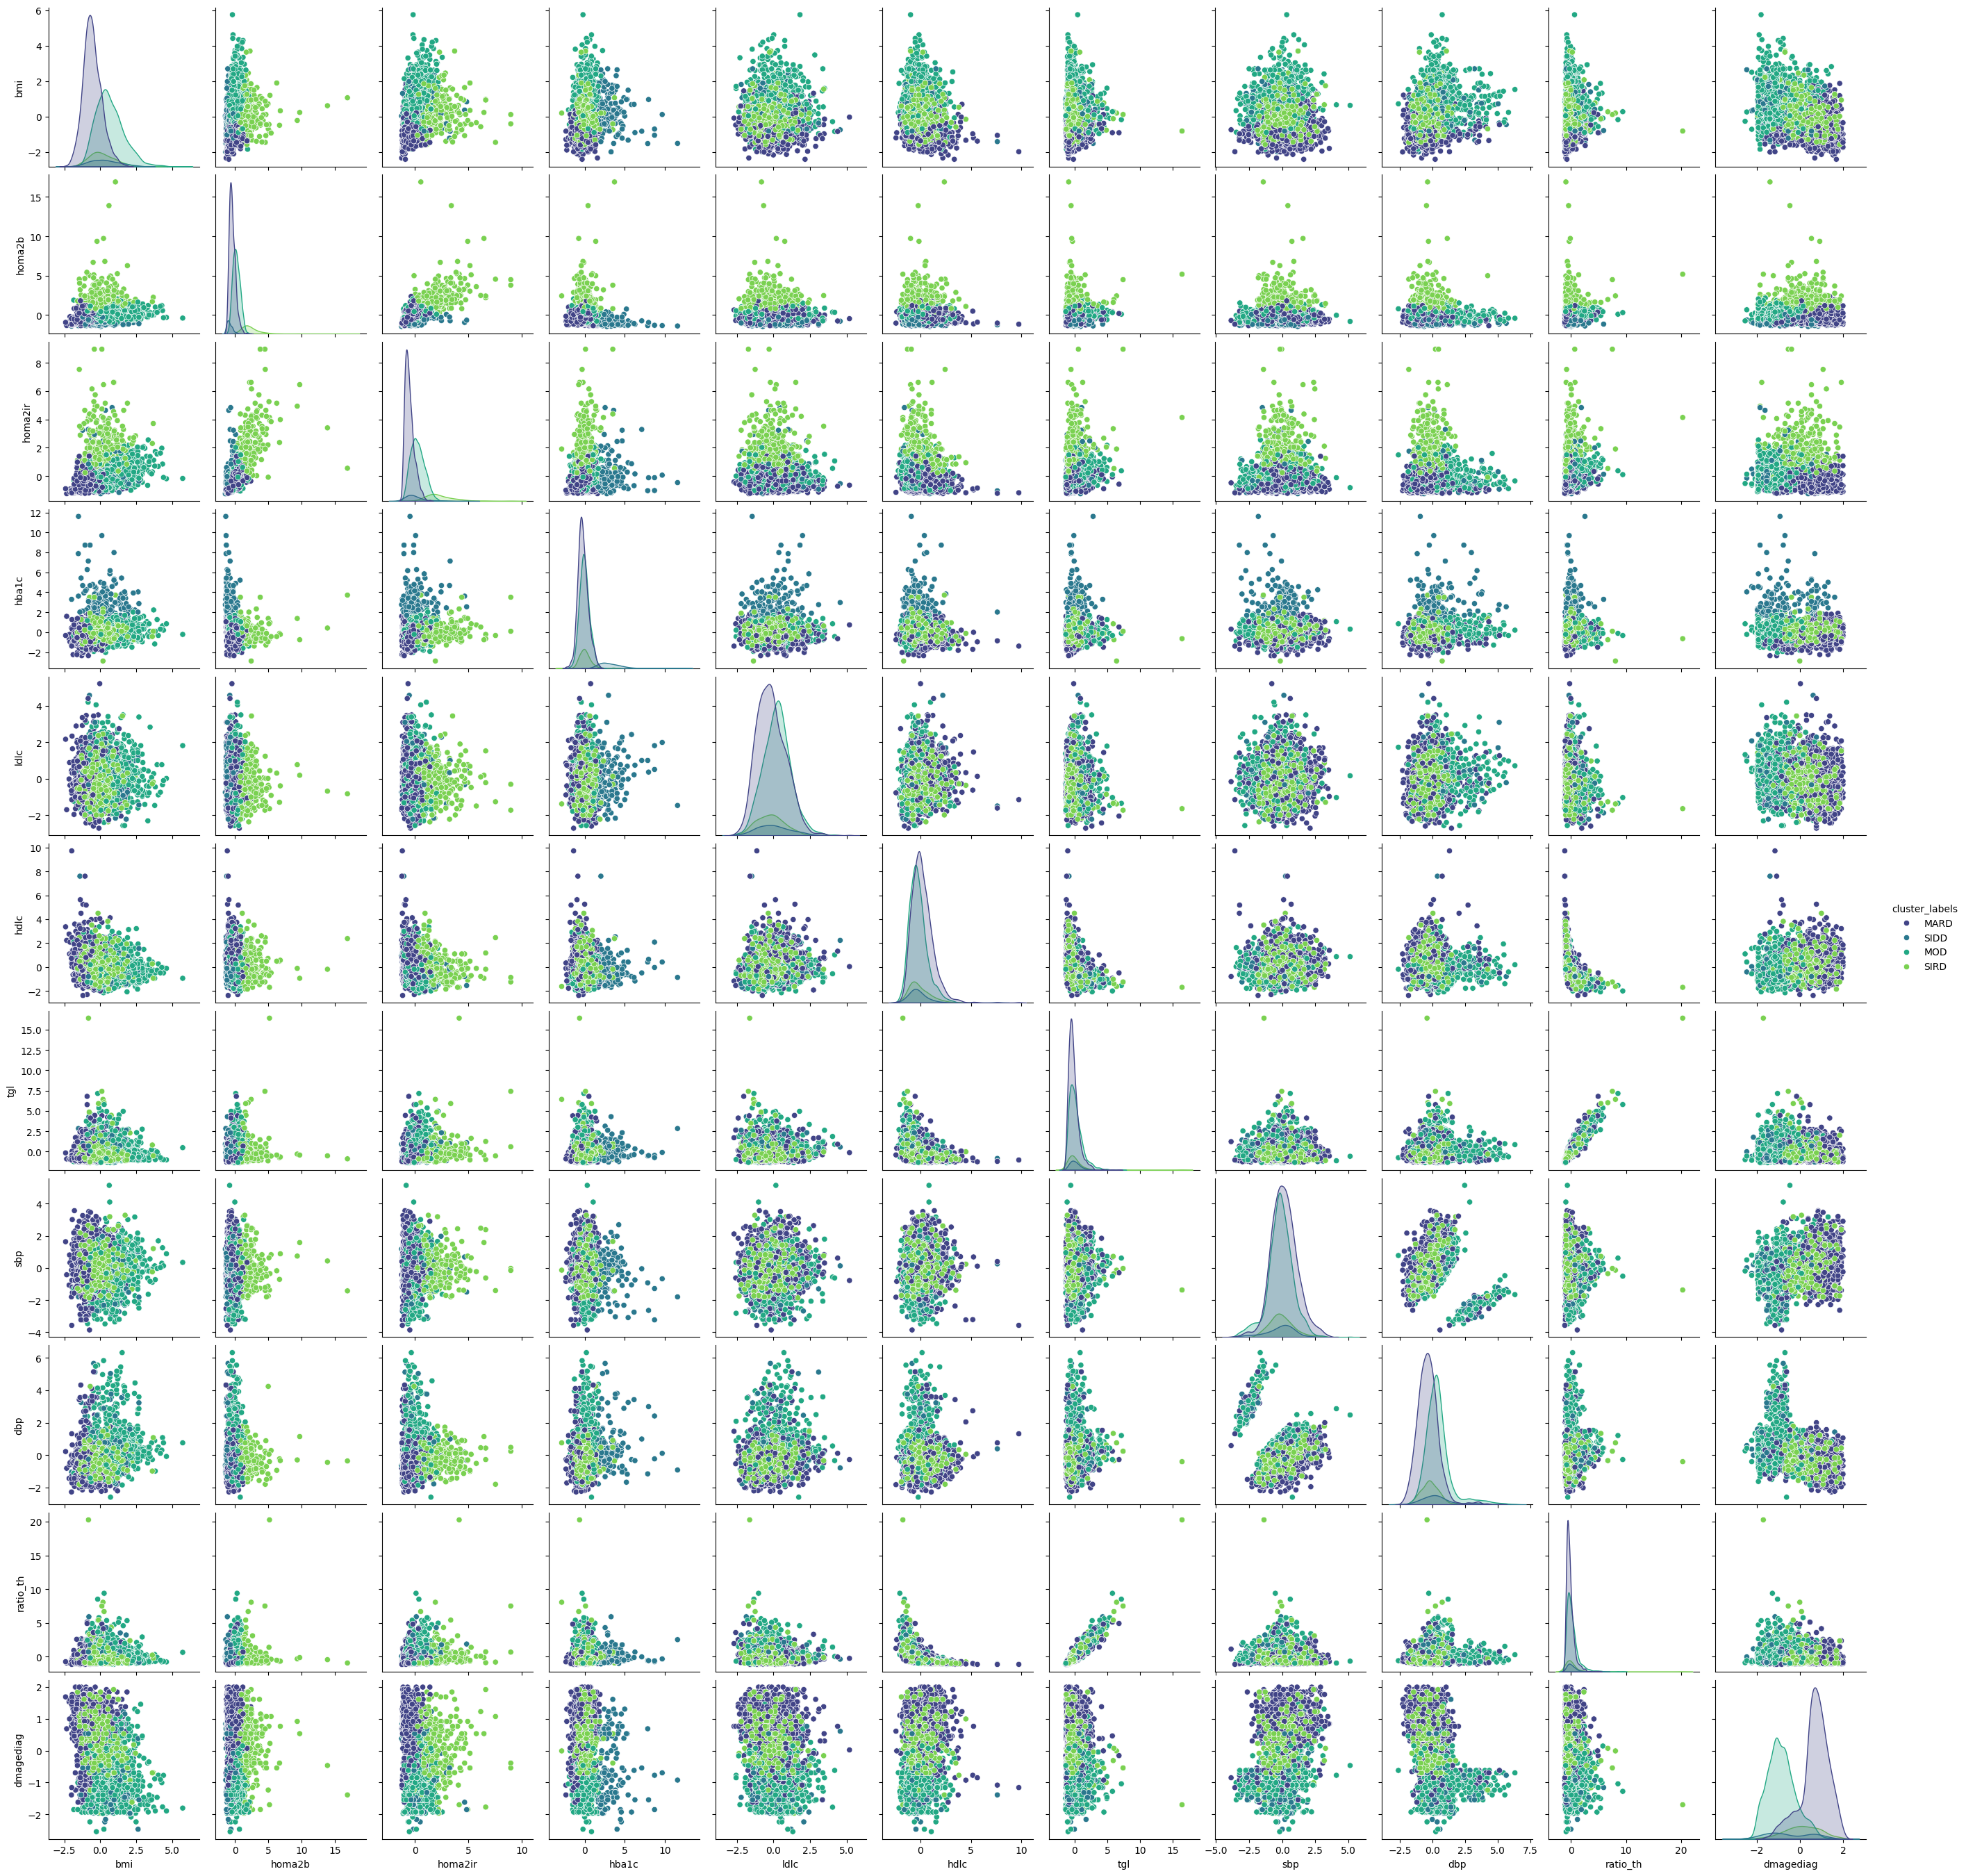

In [444]:
sns.pairplot(scaled_data_df, vars=['bmi','homa2b','homa2ir', 'hba1c', 'ldlc', 'hdlc', 'tgl', 'sbp', 'dbp', 'ratio_th', 'dmagediag'], hue='cluster_labels', palette='viridis')


In [445]:
# feasible_vars = ['bmi', 'hba1c', 'dmagediag', 'ldlc', 'hdlc','tgl','sbp','dbp','ratio_th']
feasible_vars = ['bmi', 'hba1c', 'dmagediag','sbp','ratio_th']

averages = scaled_data_df.drop(['study_id', 'study'], axis=1).groupby(['cluster','cluster_labels']).mean()
averages


homa2b   homa2ir       bmi     hba1c      ldlc  \
cluster cluster_labels                                                     
0       MOD             0.192193  0.235859  0.660645 -0.050247  0.229260   
1       MARD           -0.424802 -0.526655 -0.559847 -0.240874 -0.153784   
2       SIRD            2.399602  2.367685  0.146482  0.041590 -0.199942   
3       SIDD           -0.814051  0.068882  0.296345  3.343573  0.044584   

                            hdlc       tgl       sbp       dbp  ratio_th  \
cluster cluster_labels                                                     
0       MOD            -0.214075  0.169796 -0.148545  0.424937  0.195666   
1       MARD            0.187773 -0.164965  0.134181 -0.344684 -0.194075   
2       SIRD           -0.041165  0.136655 -0.022570 -0.184283  0.190674   
3       SIDD           -0.184555  0.161230 -0.185896  0.486448  0.176609   

                        dmagediag  glucosef2  insulinf2  
cluster cluster_labels                                   
0       MOD             -0.861747  -0.056488   0.200081  
1       MARD             0.692328  -0.143728  -0.497289  
2       SIRD             0.124030  -0.271267   2.479706  
3       SIDD            -0.471281   2.761463  -0.143969

In [446]:
init_centroids = averages[feasible_vars].__array__()
init_centroids

array([[ 0.66064526, -0.05024678, -0.86174743, -0.14854489,  0.19566604],
       [-0.55984738, -0.2408736 ,  0.69232837,  0.13418092, -0.19407531],
       [ 0.14648233,  0.04158992,  0.12403014, -0.02257047,  0.19067411],
       [ 0.29634512,  3.34357259, -0.47128099, -0.18589553,  0.17660908]])

In [447]:
kmeans_feasible = KMeans(
    init=init_centroids, n_clusters=4, max_iter=300, random_state=42
)

kmeans_feasible.fit(scaled_data_df[feasible_vars])

c:\Users\jvargh7\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jvargh7\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(init=array([[ 0.66064526, -0.05024678, -0.86174743, -0.14854489,  0.19566604],
       [-0.55984738, -0.2408736 ,  0.69232837,  0.13418092, -0.19407531],
       [ 0.14648233,  0.04158992,  0.12403014, -0.02257047,  0.19067411],
       [ 0.29634512,  3.34357259, -0.47128099, -0.18589553,  0.17660908]]),
       n_clusters=4, random_state=42)

In [448]:
scaled_data_df['cluster_feasible'] = kmeans_feasible.labels_
scaled_data_df.head()

homa2b   homa2ir       bmi     hba1c      ldlc      hdlc       tgl  \
0 -0.787103 -0.815208 -0.546199  0.312933 -0.274480 -0.114732 -1.016703   
1 -0.628631 -0.920585 -1.032148 -0.432826  0.392224  0.794037 -0.694131   
2 -0.003341 -0.171941 -0.784723 -0.752437  0.913993 -0.190463  0.034642   
3 -0.454188  0.260226  0.881468  1.910989 -0.535365  0.415383 -0.873338   
4 -0.425934  1.093595  1.426529  2.550212 -0.187519 -0.417656  0.010748   

        sbp       dbp  ratio_th  dmagediag  glucosef2  insulinf2  study_id  \
0  2.515409  0.100551 -0.766996   0.304690  -0.033430  -0.758281       4.0   
1  0.254743 -0.488672 -0.701028   1.228134  -0.773255  -0.836198      11.0   
2  1.090207  0.261248 -0.065280  -0.464847  -0.315268  -0.173904      15.0   
3 -0.334996 -0.274409 -0.749890  -0.387893   1.234841   0.137763      20.0   
4  1.876525  0.743340  0.002038  -1.619152   2.432652   0.800056      21.0   

  study  cluster cluster_labels  cluster_feasible  
0   jhs        1           MARD                 1  
1   jhs        1           MARD                 1  
2   jhs        1           MARD                 1  
3   jhs        3           SIDD                 3  
4   jhs        3           SIDD                 3

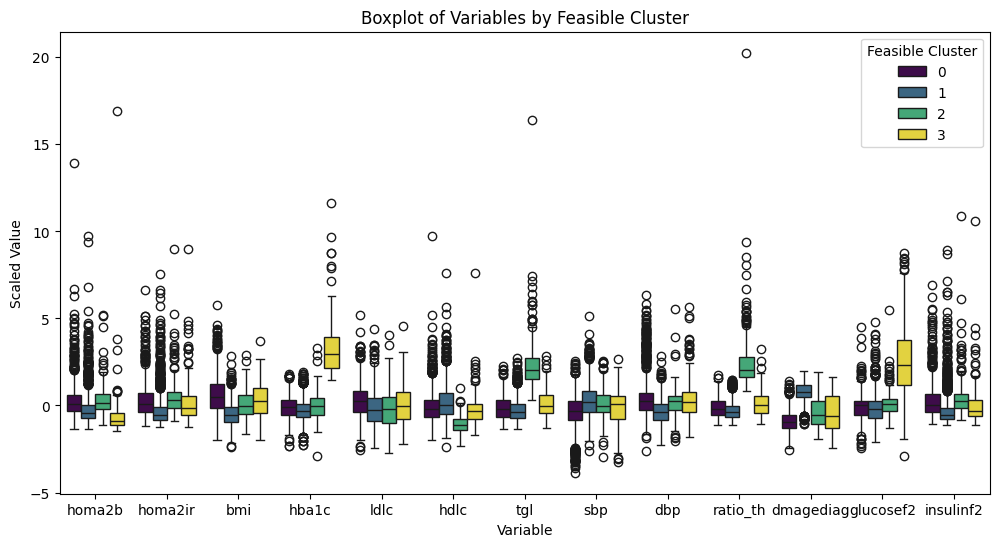

In [450]:
melted_data = pd.melt(scaled_data_df.drop(['cluster_labels','cluster'],axis=1), id_vars=['cluster_feasible','study_id','study'], var_name='Variable', value_name='Value')
plt.figure(figsize=(12, 6))
sns.boxplot(data=melted_data, x='Variable', y='Value', hue='cluster_feasible', palette='viridis')
plt.title('Boxplot of Variables by Feasible Cluster')
plt.xlabel('Variable')
plt.ylabel('Scaled Value')
plt.legend(title='Feasible Cluster', loc='upper right')
plt.show()

In [451]:
scaled_data_df['cluster_feasible_labels'] = scaled_data_df['cluster_feasible'].map({0:'MOD',1:'MARD',2:'SIRD',3:'SIDD'})


In [452]:
scaled_data_df.drop(['study_id', 'study','cluster_labels','cluster'], axis=1).groupby(['cluster_feasible','cluster_feasible_labels']).mean()


homa2b   homa2ir       bmi  \
cluster_feasible cluster_feasible_labels                                 
0                MOD                      0.259706  0.262947  0.617154   
1                MARD                    -0.200478 -0.298549 -0.515590   
2                SIRD                     0.312785  0.484120  0.096581   
3                SIDD                    -0.535472  0.309687  0.328644   

                                             hba1c      ldlc      hdlc  \
cluster_feasible cluster_feasible_labels                                 
0                MOD                     -0.070198  0.260892 -0.052913   
1                MARD                    -0.224508 -0.168892  0.213957   
2                SIRD                    -0.001605 -0.255386 -1.084447   
3                SIDD                     3.338142  0.069541 -0.178367   

                                               tgl       sbp       dbp  \
cluster_feasible cluster_feasible_labels                                 
0                MOD                     -0.129768 -0.349004  0.383961   
1                MARD                    -0.254741  0.262311 -0.365829   
2                SIRD                     2.348919  0.123653  0.220325   
3                SIDD                     0.135031 -0.147339  0.463784   

                                          ratio_th  dmagediag  glucosef2  \
cluster_feasible cluster_feasible_labels                                   
0                MOD                     -0.126387  -0.875134  -0.094132   
1                MARD                    -0.282326   0.763958  -0.160686   
2                SIRD                     2.529815  -0.382257   0.089594   
3                SIDD                     0.117796  -0.430183   2.634245   

                                          insulinf2  
cluster_feasible cluster_feasible_labels             
0                MOD                       0.248539  
1                MARD                     -0.267121  
2                SIRD                      0.455901  
3                SIDD                      0.115159

In [453]:
pd.crosstab(scaled_data_df['cluster_labels'], scaled_data_df['cluster_feasible_labels'])


cluster_feasible_labels  MARD   MOD  SIDD  SIRD
cluster_labels                                 
MARD                     1517   135     0    68
MOD                        94  1087     5   154
SIDD                        0     7   131     3
SIRD                      114    96     8    27

In [454]:
kmeans_denovofeasible = KMeans(
    init="random", n_clusters=4,n_init=10, max_iter=300, random_state=42
)

kmeans_denovofeasible.fit(scaled_data_df[feasible_vars])

KMeans(init='random', n_clusters=4, n_init=10, random_state=42)

In [455]:
scaled_data_df['cluster_denovofeasible'] = kmeans_denovofeasible.labels_
scaled_data_df.head()

homa2b   homa2ir       bmi     hba1c      ldlc      hdlc       tgl  \
0 -0.787103 -0.815208 -0.546199  0.312933 -0.274480 -0.114732 -1.016703   
1 -0.628631 -0.920585 -1.032148 -0.432826  0.392224  0.794037 -0.694131   
2 -0.003341 -0.171941 -0.784723 -0.752437  0.913993 -0.190463  0.034642   
3 -0.454188  0.260226  0.881468  1.910989 -0.535365  0.415383 -0.873338   
4 -0.425934  1.093595  1.426529  2.550212 -0.187519 -0.417656  0.010748   

        sbp       dbp  ratio_th  dmagediag  glucosef2  insulinf2  study_id  \
0  2.515409  0.100551 -0.766996   0.304690  -0.033430  -0.758281       4.0   
1  0.254743 -0.488672 -0.701028   1.228134  -0.773255  -0.836198      11.0   
2  1.090207  0.261248 -0.065280  -0.464847  -0.315268  -0.173904      15.0   
3 -0.334996 -0.274409 -0.749890  -0.387893   1.234841   0.137763      20.0   
4  1.876525  0.743340  0.002038  -1.619152   2.432652   0.800056      21.0   

  study  cluster cluster_labels  cluster_feasible cluster_feasible_labels  \
0   jhs        1           MARD                 1                    MARD   
1   jhs        1           MARD                 1                    MARD   
2   jhs        1           MARD                 1                    MARD   
3   jhs        3           SIDD                 3                    SIDD   
4   jhs        3           SIDD                 3                    SIDD   

   cluster_denovofeasible  
0                       2  
1                       2  
2                       2  
3                       1  
4                       1

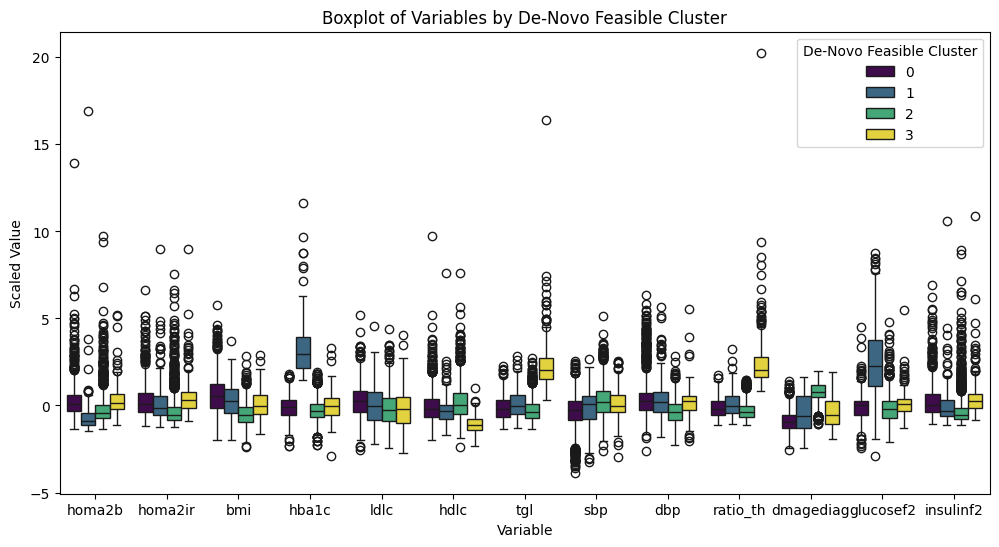

In [457]:
melted_data = pd.melt(scaled_data_df.drop(['cluster_labels','cluster','cluster_feasible','cluster_feasible_labels'],axis=1), id_vars=['cluster_denovofeasible','study_id','study'], var_name='Variable', value_name='Value')

plt.figure(figsize=(12, 6))
sns.boxplot(data=melted_data, x='Variable', y='Value', hue='cluster_denovofeasible', palette='viridis')
plt.title('Boxplot of Variables by De-Novo Feasible Cluster')
plt.xlabel('Variable')
plt.ylabel('Scaled Value')
plt.legend(title='De-Novo Feasible Cluster', loc='upper right')
plt.show()

In [464]:
scaled_data_df['cluster_denovofeasible_labels'] = scaled_data_df['cluster_denovofeasible'].map({0:'MOD',1:'SIDD',2:'MARD',3:'SIRD'})
pd.crosstab(scaled_data_df['cluster_labels'], scaled_data_df['cluster_denovofeasible_labels'])


cluster_denovofeasible_labels  MARD  MOD  SIDD  SIRD
cluster_labels                                      
MARD                           1520   68     0   132
MOD                              96  154     5  1085
SIDD                              0    3   132     6
SIRD                            115   27     8    95

In [465]:
pd.crosstab(scaled_data_df['cluster_feasible_labels'], scaled_data_df['cluster_denovofeasible_labels'])


cluster_denovofeasible_labels  MARD  MOD  SIDD  SIRD
cluster_feasible_labels                             
MARD                           1725    0     0     0
MOD                               6    0     1  1318
SIDD                              0    0   144     0
SIRD                              0  252     0     0